[2533, 2520, 2523, 2513, 2508, 2500, 2491, 2483, 2480, 2470]
Duration of movement: 30.0
Noise matrix: [[ 0.00025  0.005  ]
 [ 0.005    0.1    ]]
New P: 
[[ 101.00025   10.005  ]
 [  10.005    100.1    ]]
New P: 
[[ 104.0025   20.02  ]
 [  20.02    100.2   ]]
New P: 
[[ 109.00875   30.045  ]
 [  30.045    100.3    ]]
New P: 
[[ 116.021   40.08 ]
 [  40.08   100.4  ]]
New P: 
[[ 125.04125   50.125  ]
 [  50.125    100.5    ]]
New P: 
[[ 136.0715   60.18  ]
 [  60.18    100.6   ]]
New P: 
[[ 149.11375   70.245  ]
 [  70.245    100.7    ]]
New P: 
[[ 164.17   80.32]
 [  80.32  100.8 ]]
New P: 
[[ 181.24225   90.405  ]
 [  90.405    100.9    ]]
New P: 
[[ 200.3325  100.5   ]
 [ 100.5     101.    ]]
New P: 
[[ 221.44275  110.605  ]
 [ 110.605    101.1    ]]
New P: 
[[ 244.575  120.72 ]
 [ 120.72   101.2  ]]
New P: 
[[ 269.73125  130.845  ]
 [ 130.845    101.3    ]]
New P: 
[[ 296.9135  140.98  ]
 [ 140.98    101.4   ]]
New P: 
[[ 326.12375  151.125  ]
 [ 151.125    101.5    ]]
New P: 
[[ 357

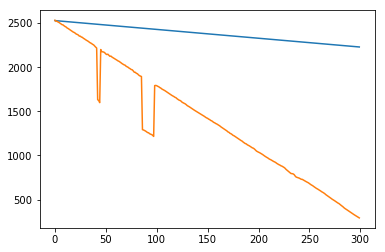

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from kalman import predict
from filterpy.common import Q_discrete_white_noise


wall_file = "RBE500-F17-100ms-Constant-Vel.csv"

with open(wall_file, "r") as f:
    data = f.read().split('\n')[:-1]
    data = [int(v) for v in data]
    
print(data[:10])
print(f"Duration of movement: {len(data) * 0.1}")

initial_pos = 2530
velocity = -10.0
variance = 10.0
dt = 0.1
F = np.array([[1., dt],
              [0., 1.]])
P = np.array([[100., 0],
              [0, 100.0]])
H = np.array([[1., 0.]])
R = np.array([[variance]])
Q = Q_discrete_white_noise(dim=2, dt=0.1, var=10)
x = np.array([initial_pos, velocity]).T

predicted_xs = []

print(f"Noise matrix: {Q}")
for _ in range(300):
    x, P = predict(x, P, F, Q)
    predicted_xs.append(x[0])
    print(f"New P: \n{P}")
    
plt.plot(predicted_xs)
plt.plot(data)
plt.show()